# GPU Configuration

In [1]:
!nvidia-smi

Thu Oct 20 15:24:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing Packages

In [2]:
import os
import sys
import numpy as np
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as image
from pprint import pprint

# keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory as ImageDataStore
import tensorflow as tf

# Mounting Drive

In [3]:
if not os.path.isdir("/content/Network_Data"):

    if not os.path.isdir("/content/drive"):

        drive.mount("Drive")

    !unzip -qq /content/Drive/MyDrive/Network_Data.zip

Mounted at Drive


# Functions

In [4]:
def get_model(Input_Dimension, Output_Classes):
    
    # Input Layer
    input = keras.Input(Input_Dimension)
    
    # First Layer
    x = layers.Conv2D(96, kernel_size=(7, 7), strides=2, activation="relu")(input)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Seconds Layer
    x = layers.Conv2D(32, kernel_size=(5, 5), strides=2 , activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    # Thrid Layer
    x = layers.Conv2D(16 , kernel_size=(3, 3), strides=2, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Fourth Layer
    x = layers.Conv2D(8, kernel_size=(3, 3), strides=2, activation="relu")(x)
    x = layers.Flatten()(x)

    # Fifth Layer
    x = layers.Dense(50, activation="relu")(x)

    # Sixth Layer
    x = layers.Dense(32, activation="relu")(x)

    # Seventh Layer
    output = layers.Dense(Output_Classes , activation="softmax")(x)

    # Build Model
    model = keras.Model(input, output)
    
    return model

In [5]:
def file_reader(folder):
    List = list()
    for filename in os.listdir(folder):

        List.append(image.imread(folder+ "/" + filename))
        
    return np.array(List)

In [6]:
HC_Folder = "/content/Network_Data/HC"
PD_ON_Folder = "/content/Network_Data/PD_ON"
PD_OFF_Folder = "/content/Network_Data/PD_OFF"

In [7]:
HC_X = file_reader(HC_Folder)
PD_ON_X = file_reader(PD_OFF_Folder)
PD_OFF_X = file_reader(PD_ON_Folder)

In [8]:
HC_Y = np.ones((HC_X.shape[0]))
PD_ON_Y = np.zeros((PD_ON_X.shape[0]))
PD_OFF_Y = np.zeros((PD_OFF_X.shape[0]))

In [9]:
X_Train = np.concatenate((HC_X, PD_OFF_X), axis=0)
Y_Train = np.concatenate((HC_Y, PD_OFF_Y))

In [10]:
Permutation = np.random.permutation(X_Train.shape[0])
X_Train = np.around(X_Train[Permutation]/255, 4)
Y_Train = Y_Train[Permutation]
Y_Train = tf.keras.utils.to_categorical(Y_Train, 2)

# Training the Propsed Model using Pytorch

In [11]:
epochs = 60
batch_size = 75
learning_rate = 1e-4
learning_rate_factor = 20

CNNModel = get_model((227, 227, 3), 2)
CNNModel.summary()

optimizer = keras.optimizers.Adam(learning_rate= learning_rate * learning_rate_factor, beta_1=0.99)
CNNModel.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 111, 111, 96)      14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        76832     
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                             

In [12]:
Training_Information = CNNModel.fit(X_Train, Y_Train,
                                    batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/60
37/37 [==============================] - 13s 101ms/step - loss: 0.6626 - accuracy: 0.5658 - val_loss: 0.5343 - val_accuracy: 0.7467
Epoch 2/60
37/37 [==============================] - 3s 80ms/step - loss: 0.5757 - accuracy: 0.7385 - val_loss: 0.5786 - val_accuracy: 0.7566
Epoch 3/60
37/37 [==============================] - 3s 80ms/step - loss: 0.5624 - accuracy: 0.7649 - val_loss: 0.5339 - val_accuracy: 0.7928
Epoch 4/60
37/37 [==============================] - 3s 80ms/step - loss: 0.5160 - accuracy: 0.7822 - val_loss: 0.4756 - val_accuracy: 0.7829
Epoch 5/60
37/37 [==============================] - 3s 80ms/step - loss: 0.4828 - accuracy: 0.7840 - val_loss: 0.4402 - val_accuracy: 0.8191
Epoch 6/60
37/37 [==============================] - 3s 80ms/step - loss: 0.4449 - accuracy: 0.8141 - val_loss: 0.4012 - val_accuracy: 0.8618
Epoch 7/60
37/37 [==============================] - 3s 80ms/step - loss: 0.4240 - accuracy: 0.8203 - val_loss: 0.3462 - val_accuracy: 0.8750
Epoch 8/60


In [13]:
loss = Training_Information.history["loss"]
validation_loss = Training_Information.history["val_loss"]

accuracy = Training_Information.history["accuracy"]
validation_accuracy = Training_Information.history["val_accuracy"]

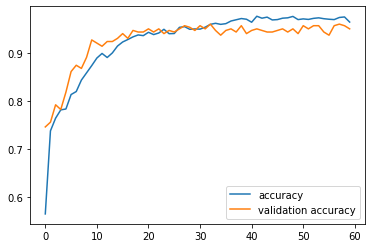

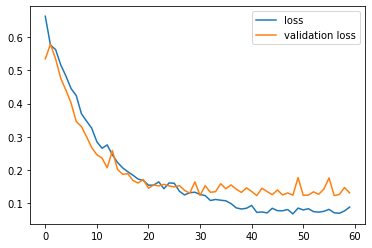

In [14]:
plt.plot(accuracy)
plt.plot(validation_accuracy)
plt.legend(["accuracy", "validation accuracy"])
plt.show()

plt.plot(loss)
plt.plot(validation_loss)
plt.legend(["loss", "validation loss"])
plt.show()

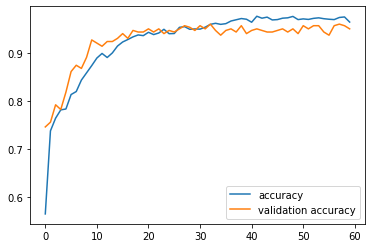

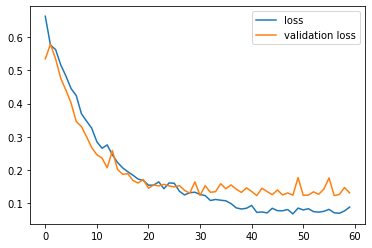

In [15]:
plt.plot(accuracy)
plt.plot(validation_accuracy)
plt.legend(["accuracy", "validation accuracy"])
plt.show()

plt.plot(loss)
plt.plot(validation_loss)
plt.legend(["loss", "validation loss"])
plt.show()